In [ ]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap
sns.set_theme(context='paper', style='white', font="Helvetica", font_scale=1, color_codes=True, rc=None)
sns.set_style("ticks")

In [80]:
#Get and sort errors of interpolation
def get_errors(resolution='1x'):
    #read errors
    errors_interpolation=pd.read_csv('../data/'+ 'all_errors_interpolation' +  '.csv',index_col=0)
    columns=["sigma", "function","rmse_nn_interp.", "rmse_nn_extrap.", "rmse_mdl_interp.", "rmse_mdl_extrap.", "n", "r"]
    errors_interpolation=errors_interpolation[columns]

    #divide between train/test
    errors_interpolation_train=errors_interpolation[["sigma","function", "rmse_nn_interp.", "rmse_mdl_interp.","n", "r"]]
    errors_interpolation_train=pd.melt(errors_interpolation_train,id_vars=["sigma","function", "n", "r"], var_name="error_interp.",value_name= "value_interp.")   

    errors_interpolation_test=errors_interpolation[["sigma","function", "rmse_nn_extrap.", "rmse_mdl_extrap.","n", "r"]]
    errors_interpolation_test=pd.melt(errors_interpolation_test,id_vars= ["sigma","function", "n", "r"], var_name="error_extrap.", value_name= "value_extrap.")

    #Separate tanh and leaky ReLU
    errors_t_tr=errors_interpolation_train[errors_interpolation_train['function']=='tanh']
    errors_t_tt=errors_interpolation_test[errors_interpolation_test['function']=='tanh']

    errors_l_tr=errors_interpolation_train[errors_interpolation_train['function']=='leaky_ReLU']
    errors_l_tt=errors_interpolation_test[errors_interpolation_test['function']=='leaky_ReLU']

    return errors_t_tr, errors_t_tt, errors_l_tr, errors_l_tt

In [81]:
#Read errors and take rmse
resolution='1x' #0.5x, 1x, 2x, 4e-3x
errors_tanh_inter, errors_tanh_extra, errors_leaky_inter, errors_leaky_extra=get_errors()

display(errors_tanh_inter)

,sigma,function,n,r,error_interp.,value_interp.
0,0.0,tanh,0,0,rmse_nn_interp.,0.012386
1,0.0,tanh,1,0,rmse_nn_interp.,0.012122
2,0.0,tanh,2,0,rmse_nn_interp.,0.006643
3,0.0,tanh,3,0,rmse_nn_interp.,0.001461
4,0.0,tanh,4,0,rmse_nn_interp.,0.002459
...,...,...,...,...,...,...
985,0.2,tanh,5,2,rmse_mdl_interp.,0.038005
986,0.2,tanh,6,2,rmse_mdl_interp.,0.116825
987,0.2,tanh,7,2,rmse_mdl_interp.,0.116529
988,0.2,tanh,8,2,rmse_mdl_interp.,0.076724


In [87]:
#Figure configuration
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
#width = 8*cm; height=6*cm
width = 16*cm; height=16*cm

#colors from seaborn's colorblind palette
color_data=sns.color_palette("colorblind")[0]
color_noise=sns.color_palette("colorblind")[7]
color_ann=sns.color_palette("colorblind")[4]
color_bms=sns.color_palette("colorblind")[2]

color_ann='#de2d26' 
color_bms='#3182bd'


#Fonts and sizes                                                                                    
size_axis=14;size_ticks=12;size_title=5
line_w=1; m_size=8 #width and marker size                                                          
markers = {'rmse_nn_train': 'o', 'rmse_mdl_train': 's'}

output_path='../results/'

resamples=100000; bs_seed=1111 #number of resamples
ymin=1e-4;ymax=0.75

6.299212598425196 6.299212598425196
6.299212598425196 6.299212598425196


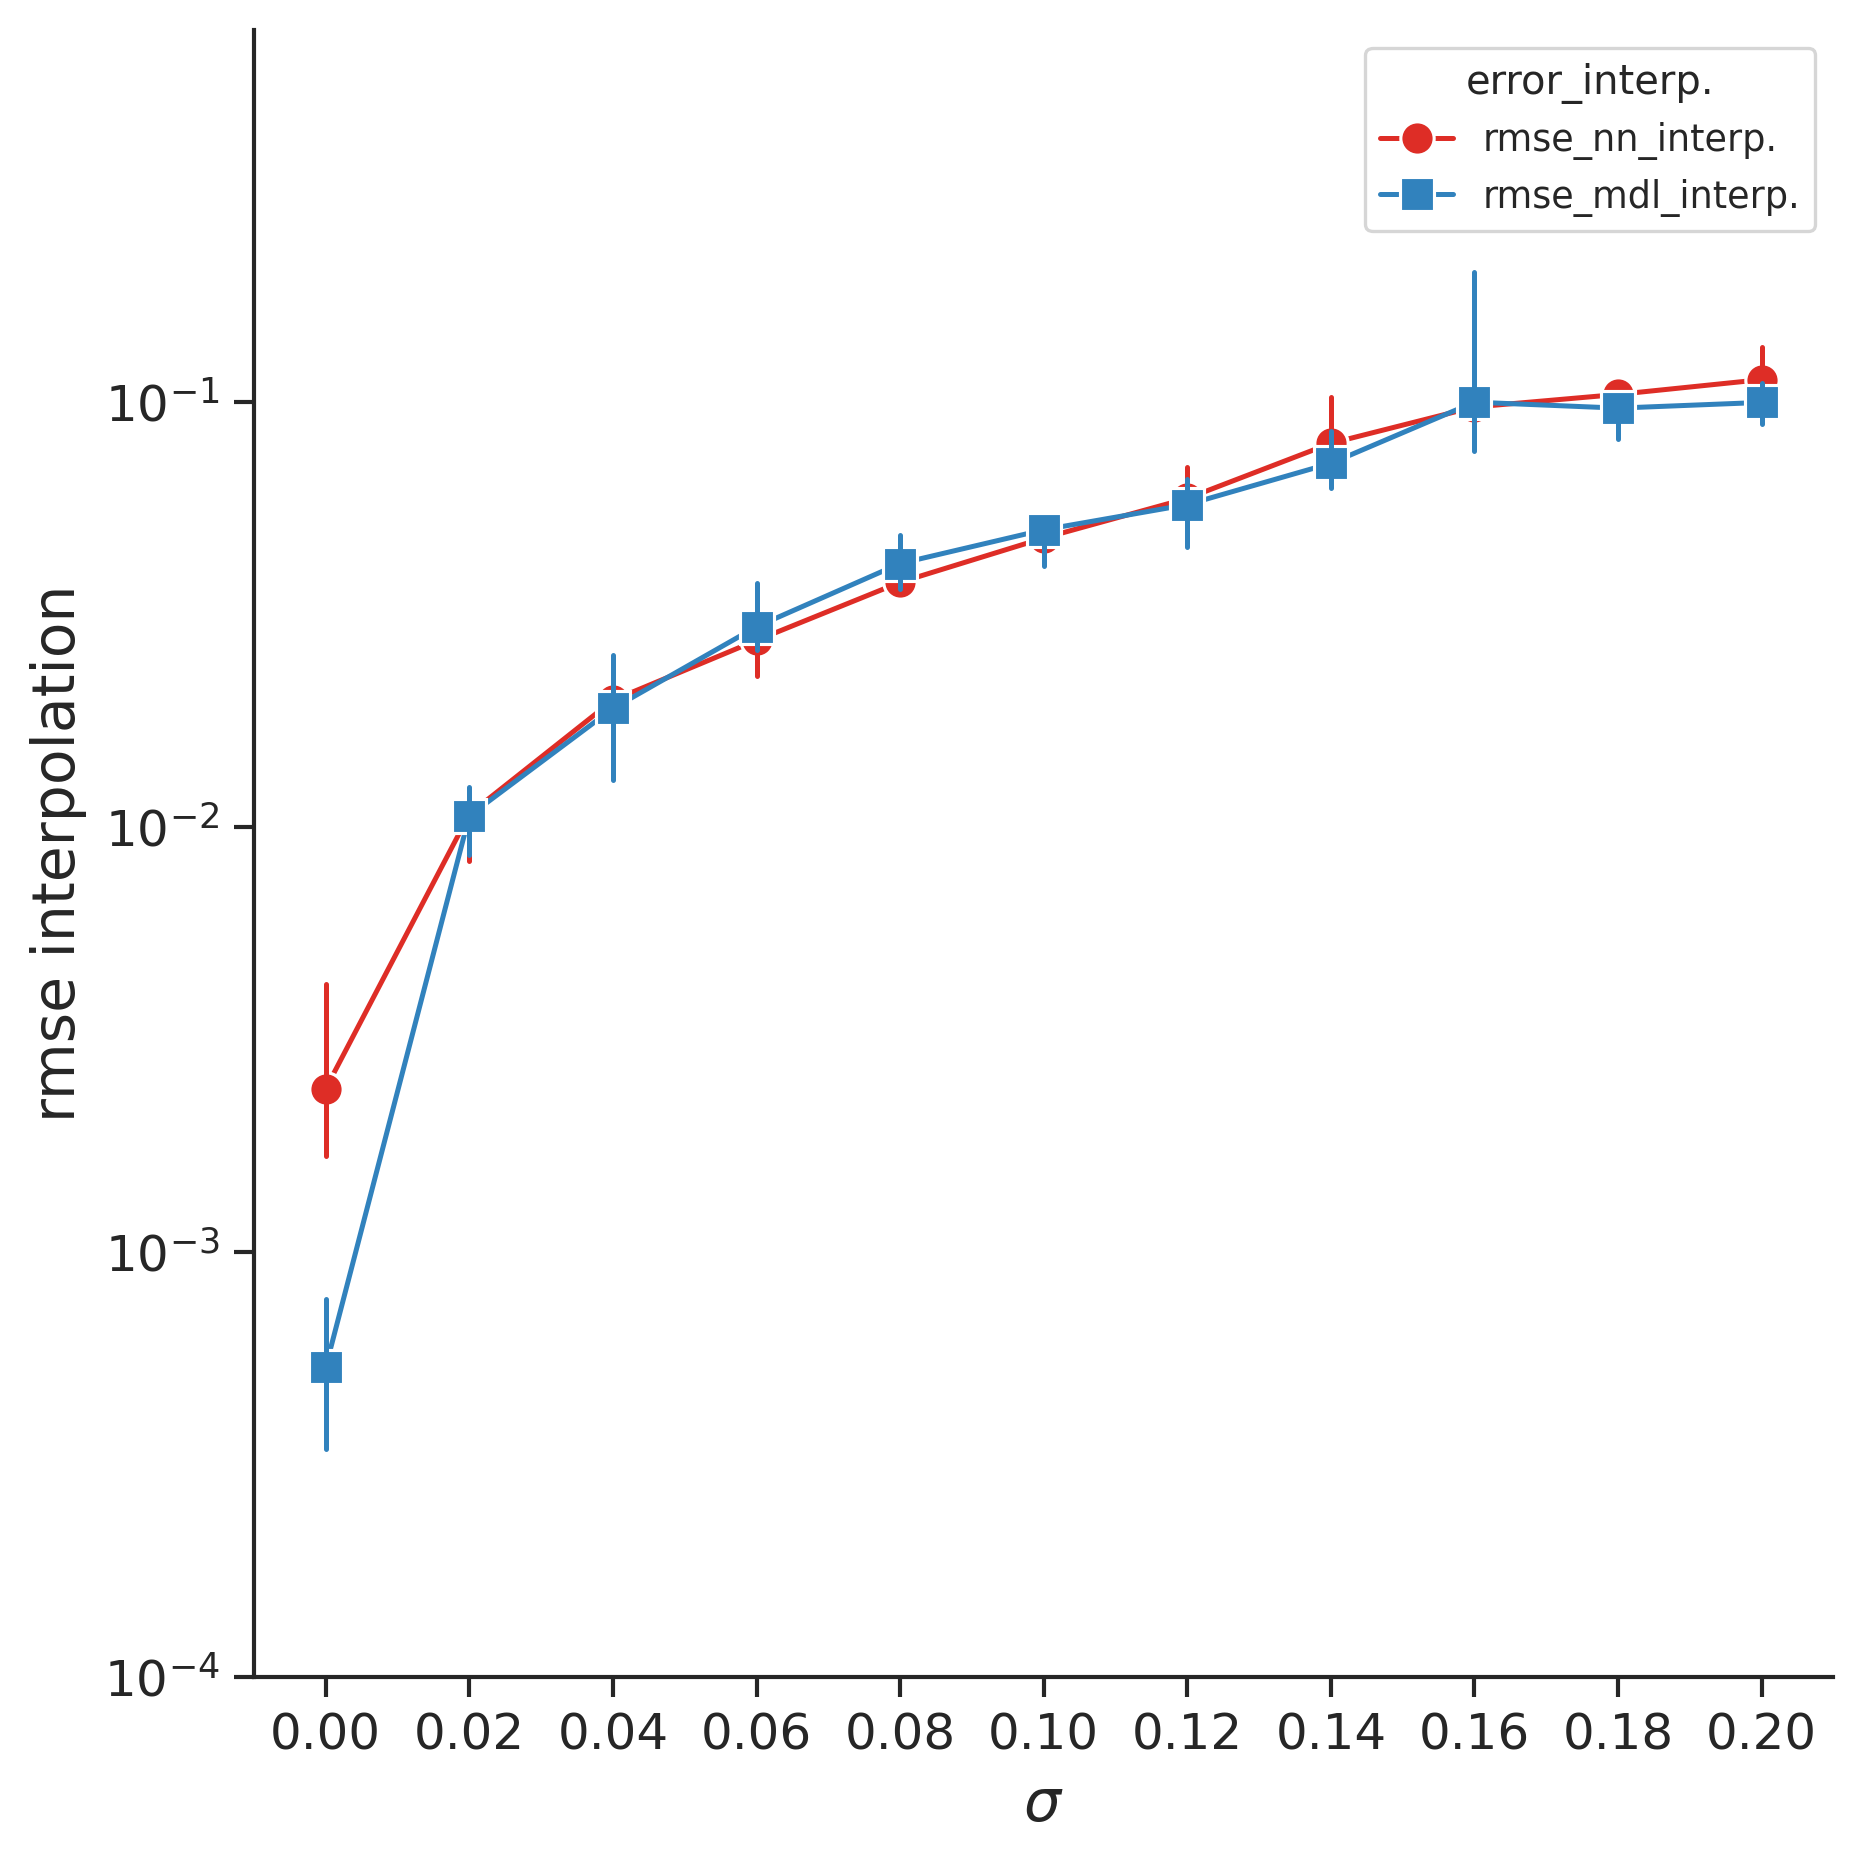

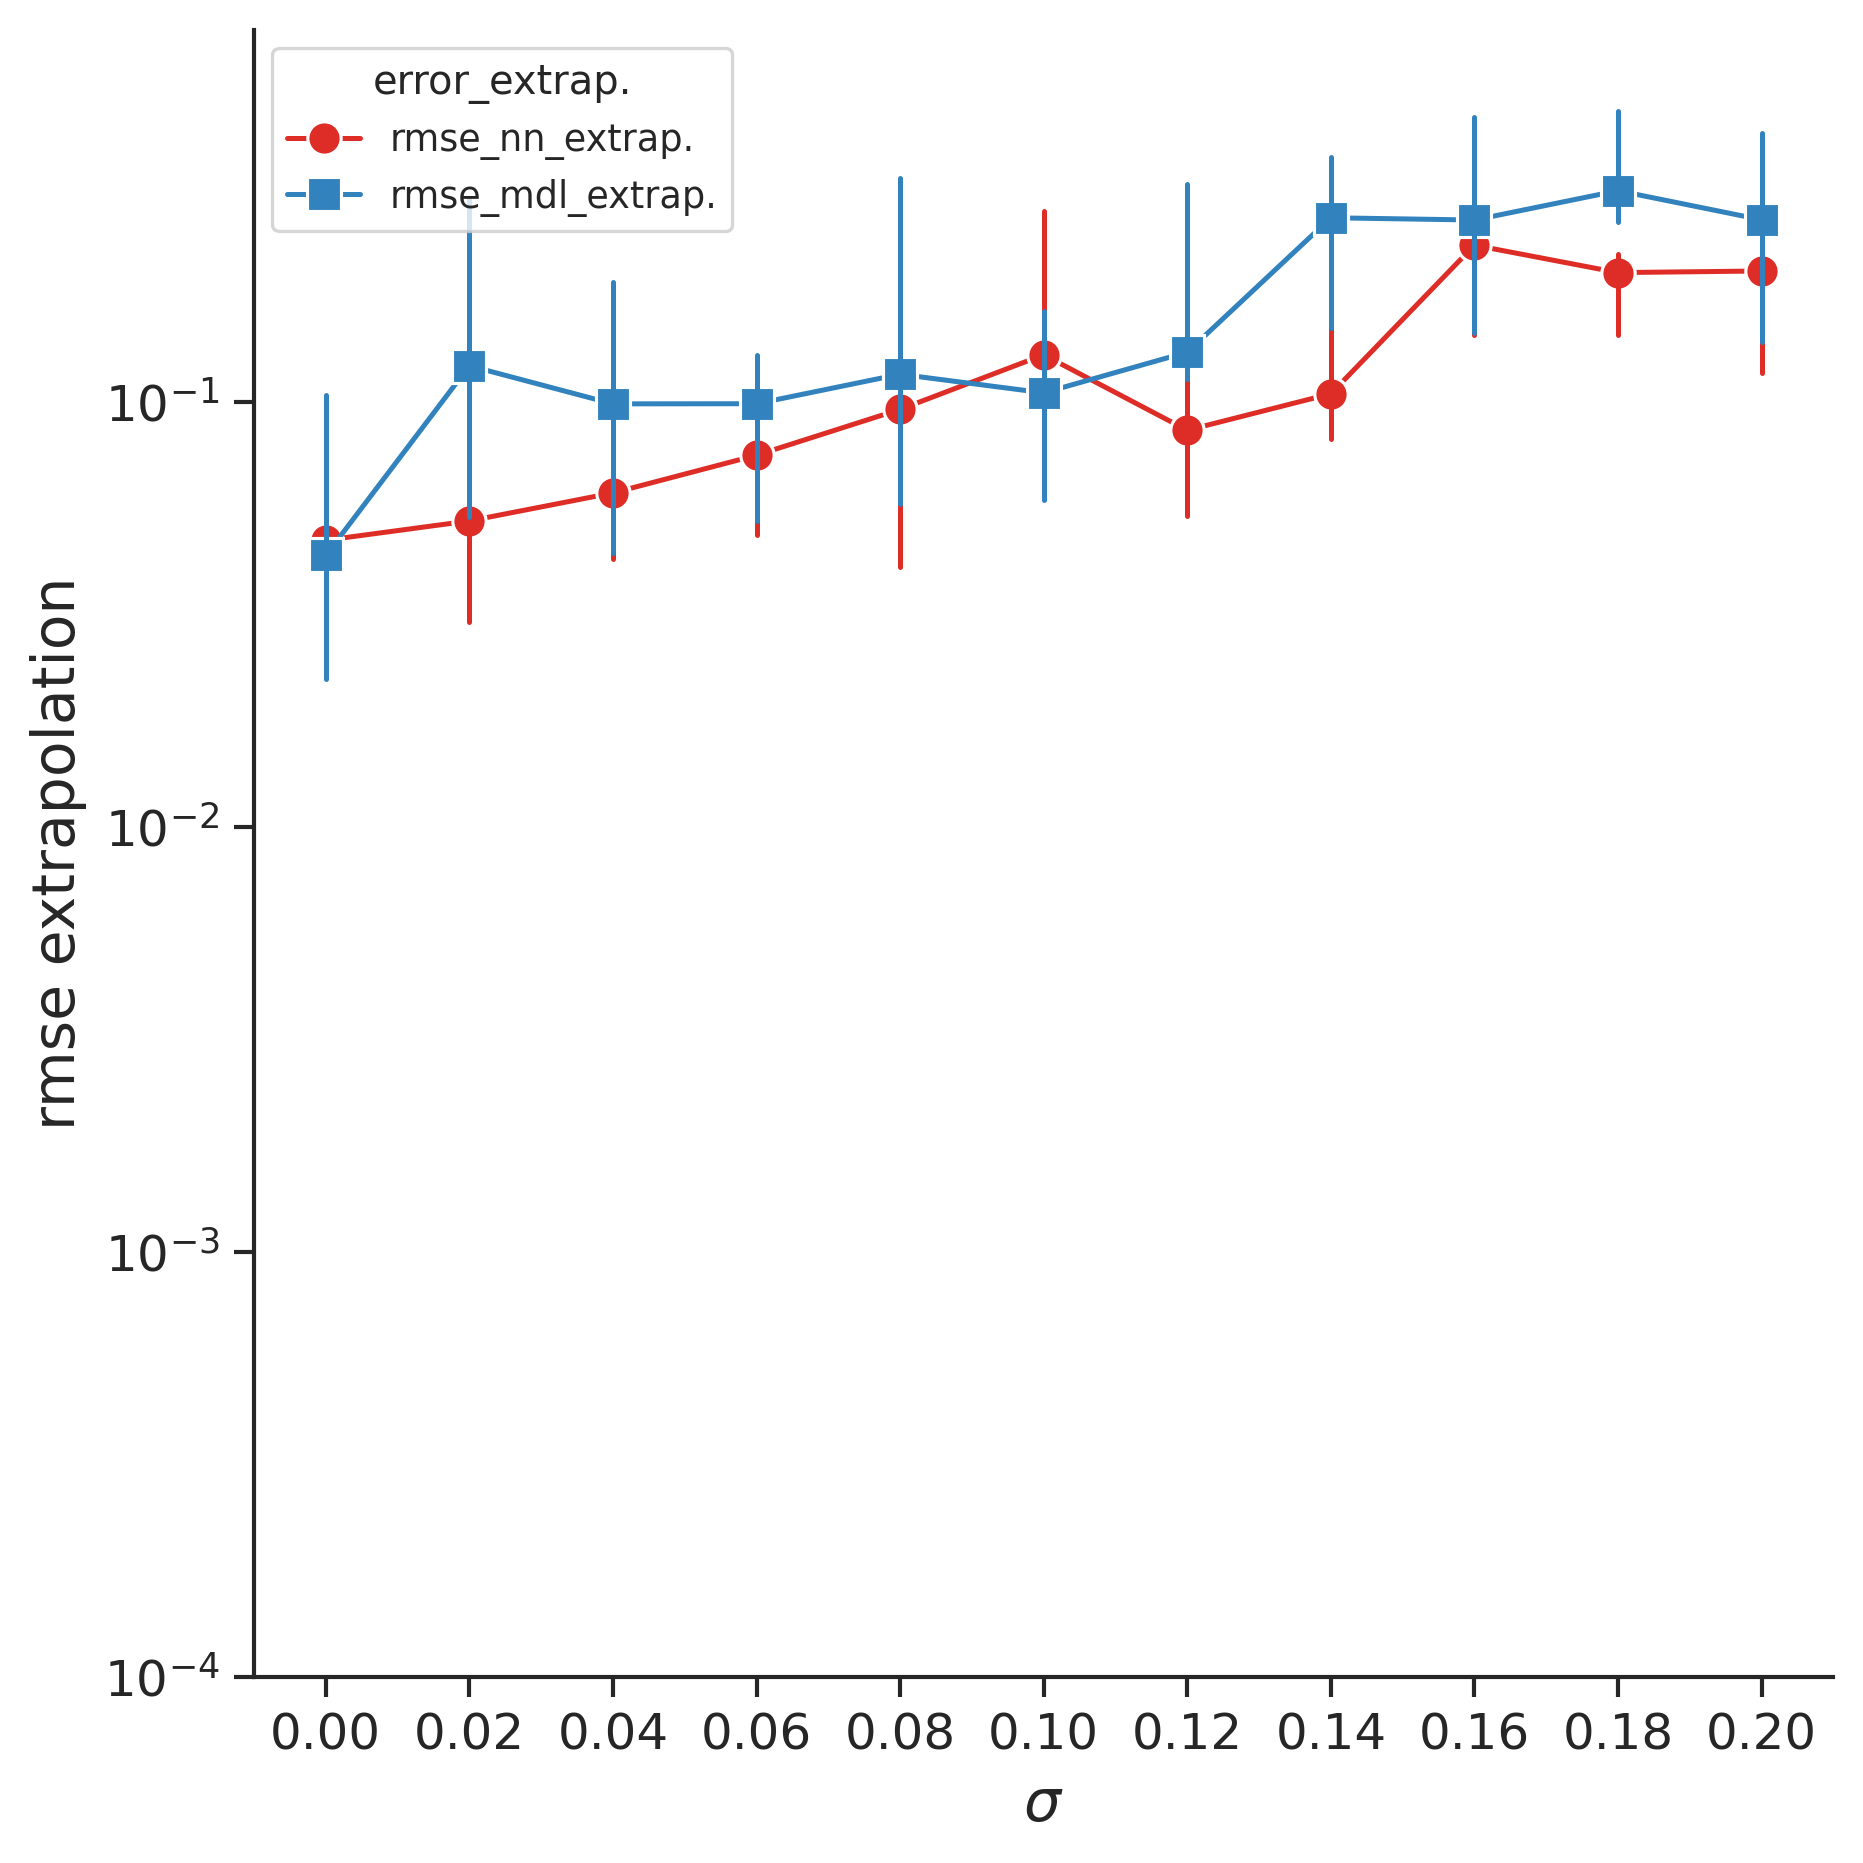

In [88]:
#Plot tanh interpolation new version
#----------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_tanh_inter, x='sigma', y='value_interp.', hue='error_interp.', style='error_interp.',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse interpolation',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
xtick_labels=np.arange(0.0,0.22,0.02)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
plt.tight_layout()

name_fig= 'interpolation_medians_tanh' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

#Plot tanh extrapolation
#----------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_tanh_extra, x='sigma', y='value_extrap.', hue='error_extrap.', style='error_extrap.',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse extrapolation',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
xtick_labels=np.arange(0.0,0.22,0.02)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
plt.tight_layout()

name_fig= 'extrapolation_medians_tanh' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

6.299212598425196 6.299212598425196
6.299212598425196 6.299212598425196


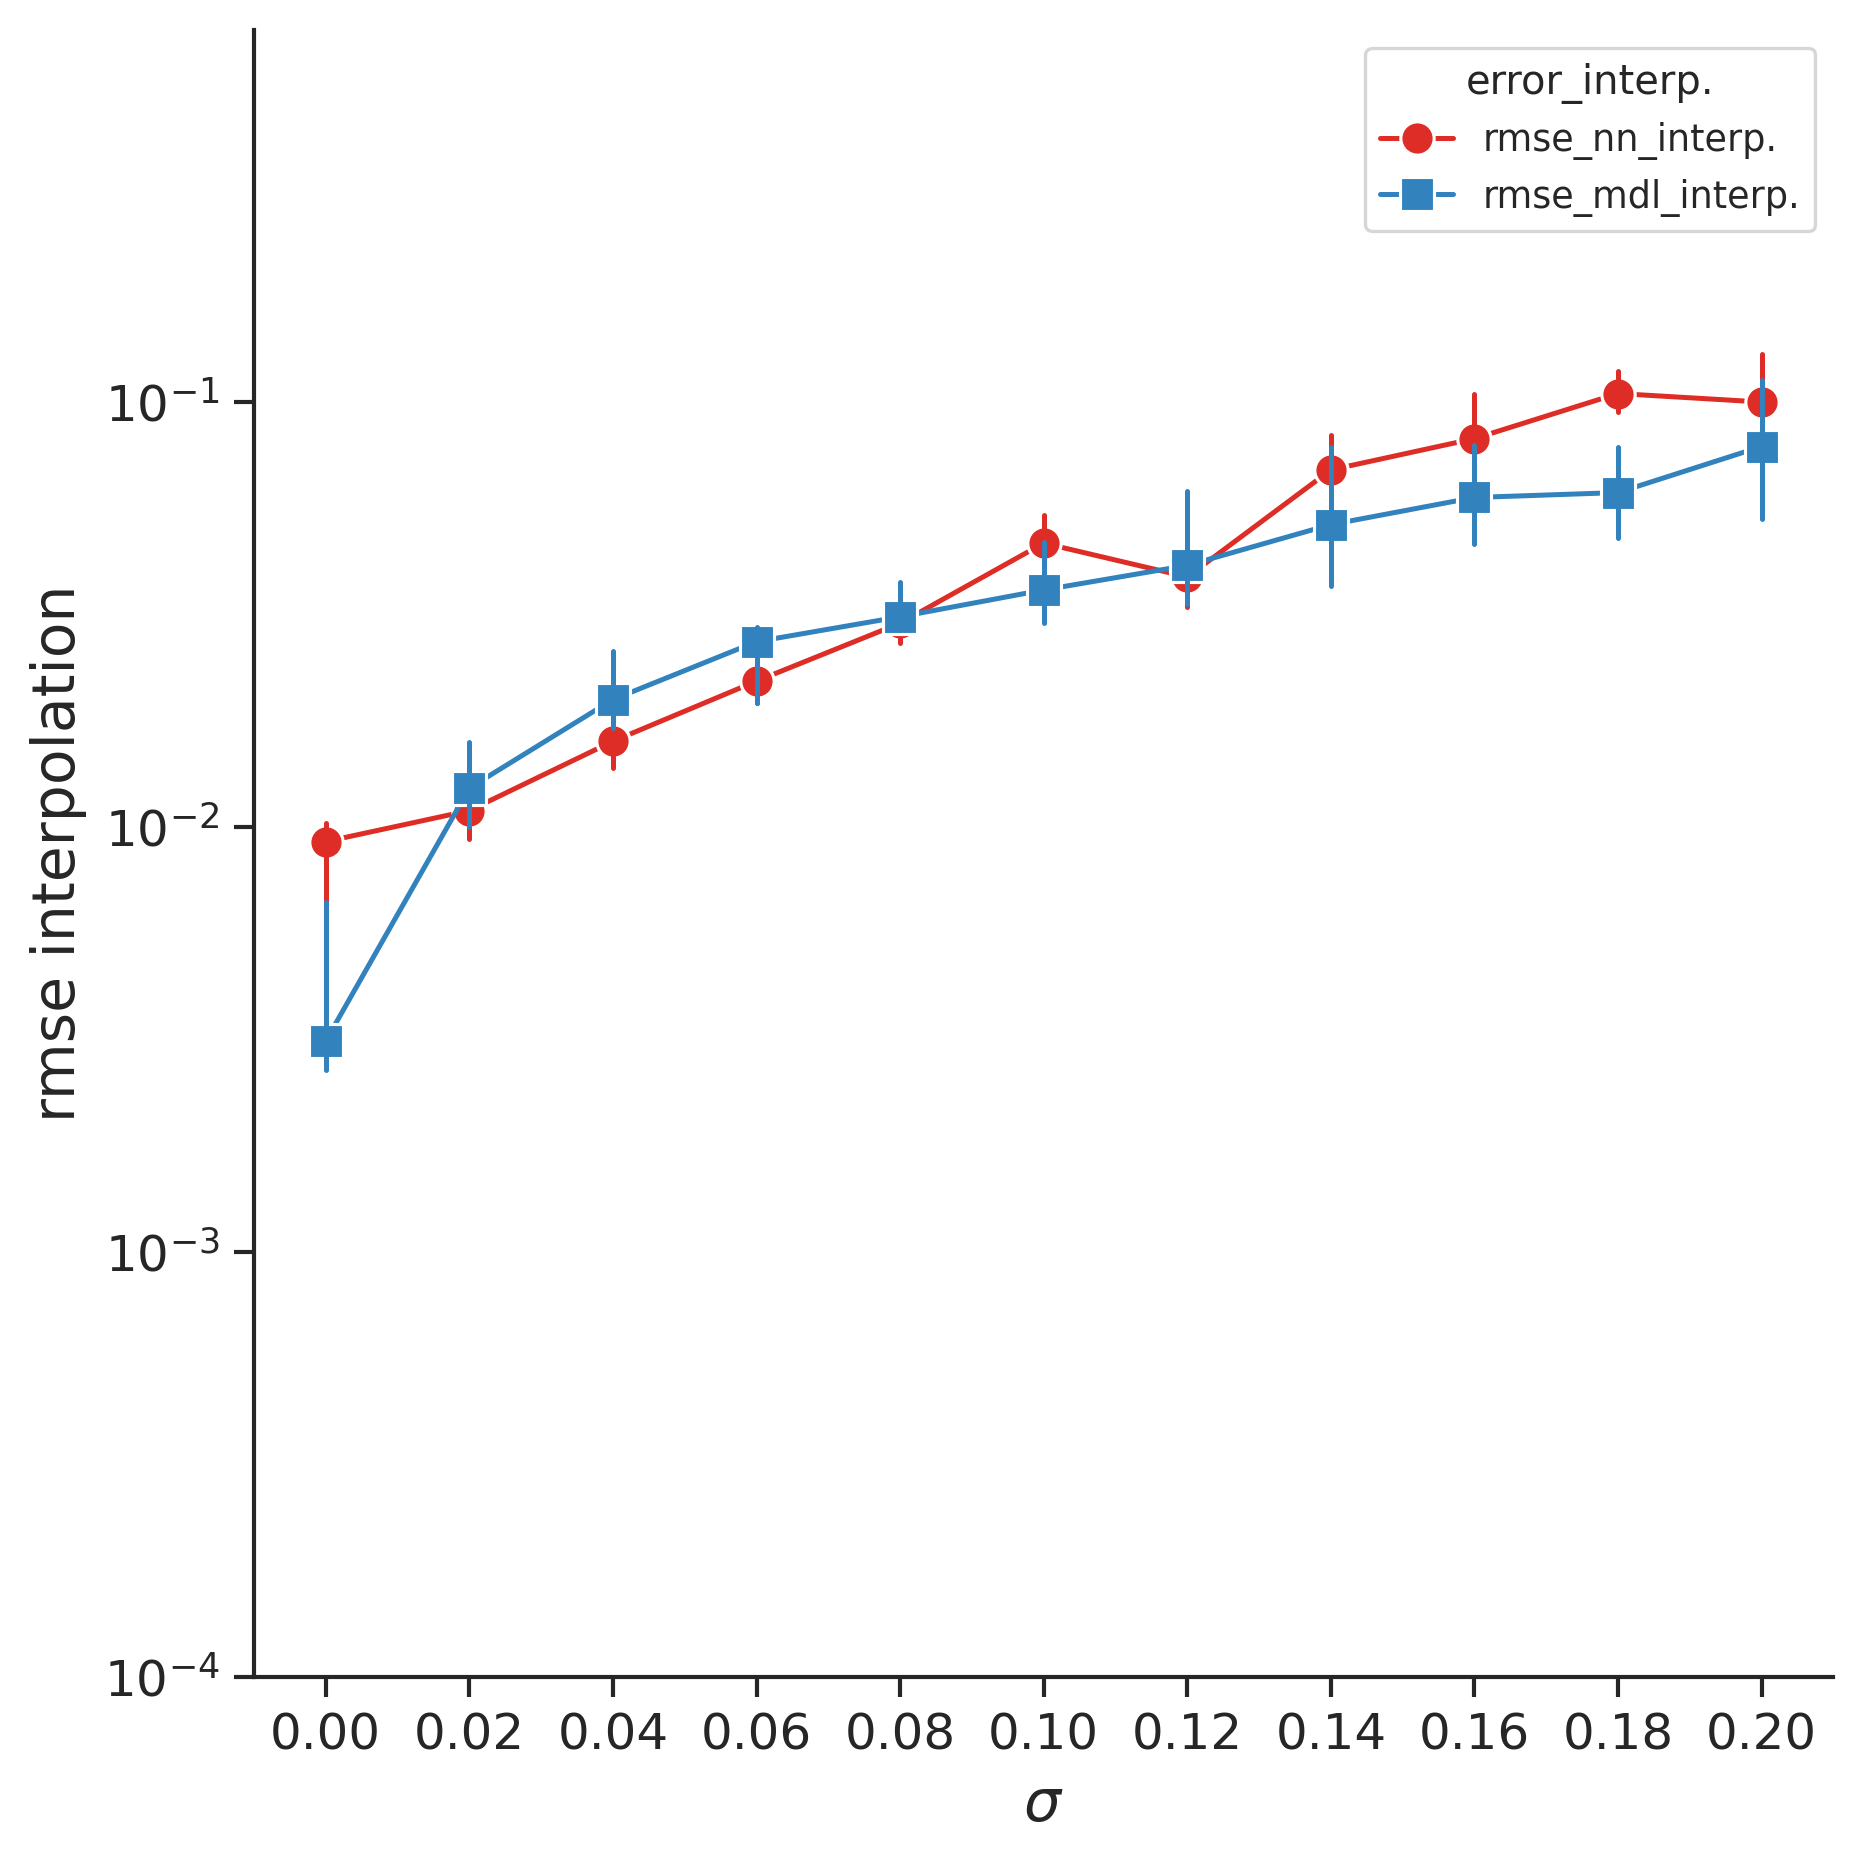

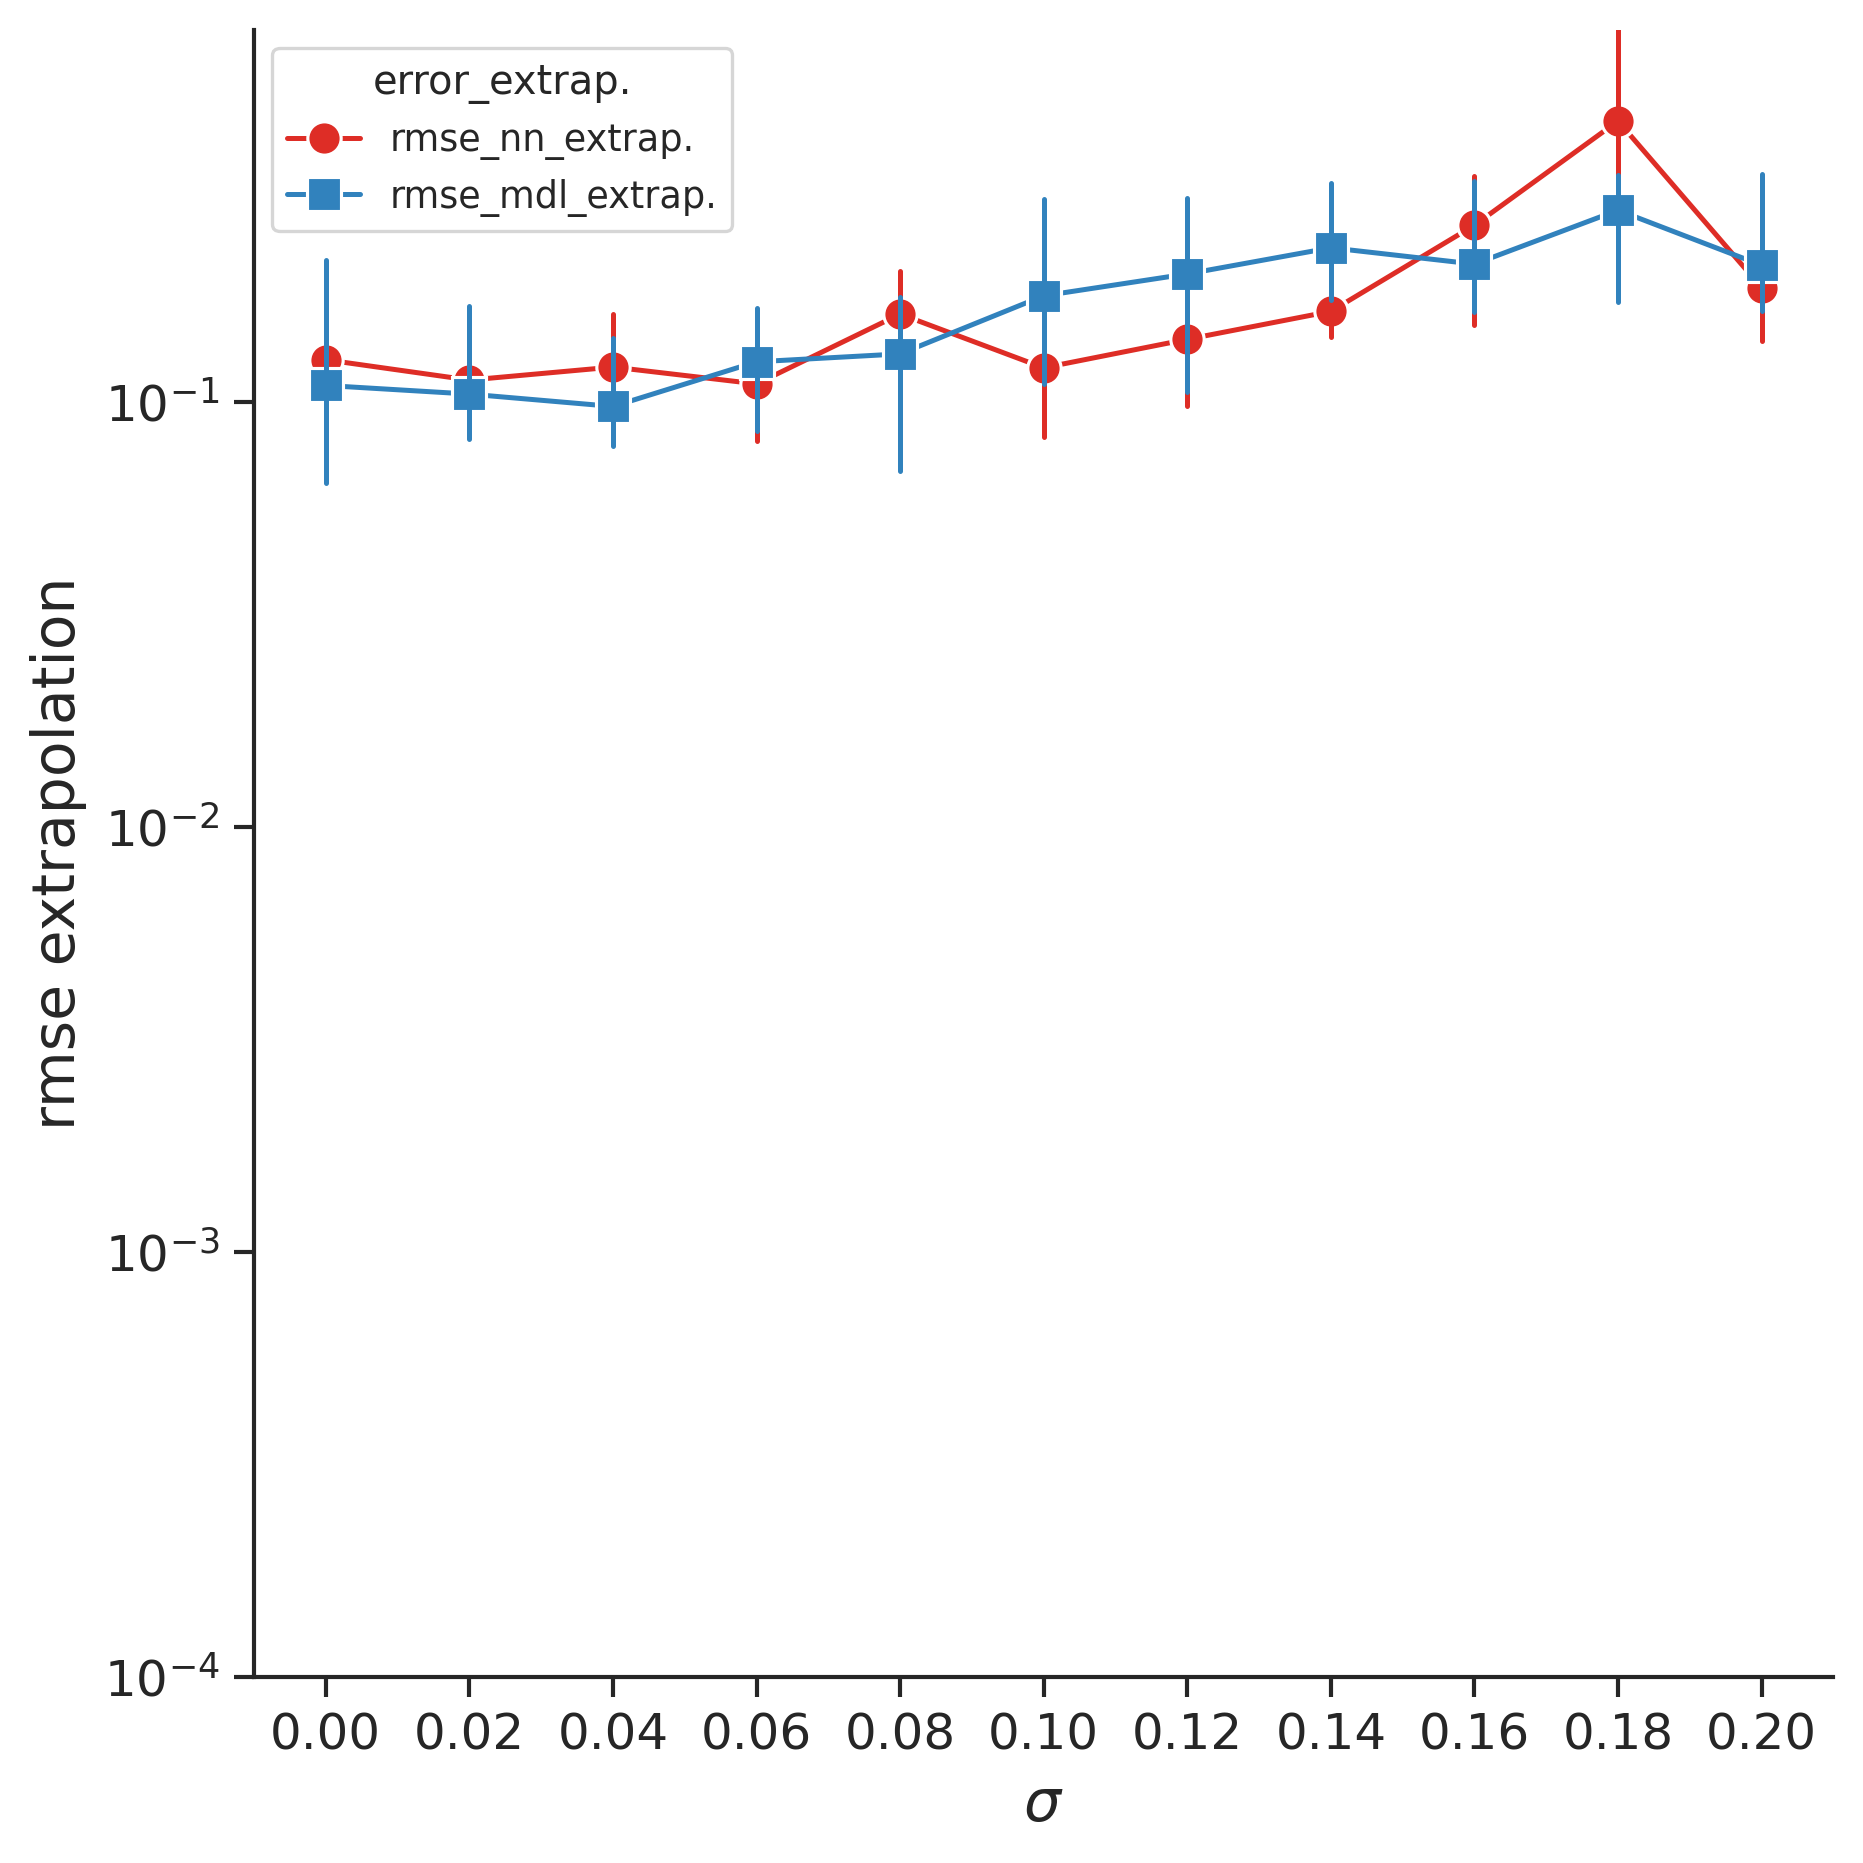

In [89]:
#Plot leaky interpolation new version
#----------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_leaky_inter, x='sigma', y='value_interp.', hue='error_interp.', style='error_interp.',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse interpolation',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
xtick_labels=np.arange(0.0,0.22,0.02)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
plt.tight_layout()

name_fig= 'interpolation_medians_leaky' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

#Plot tanh extrapolation
#----------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_leaky_extra, x='sigma', y='value_extrap.', hue='error_extrap.', style='error_extrap.',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse extrapolation',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
xtick_labels=np.arange(0.0,0.22,0.02)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
plt.tight_layout()

name_fig= 'extrapolation_medians_leaky' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

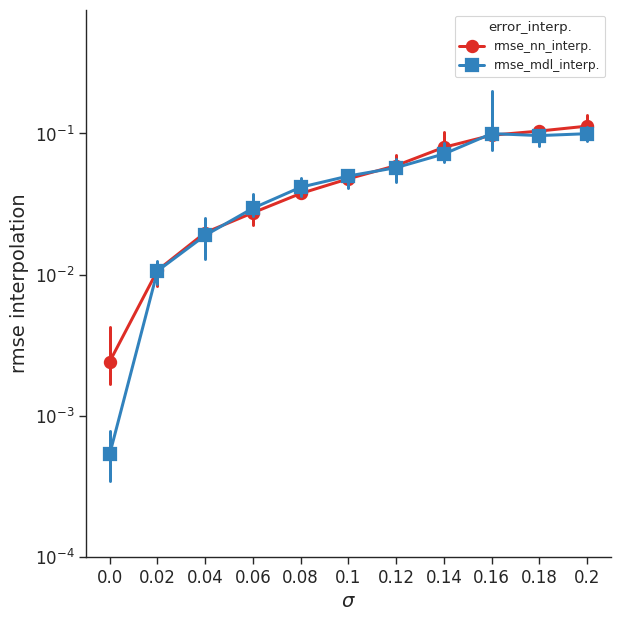

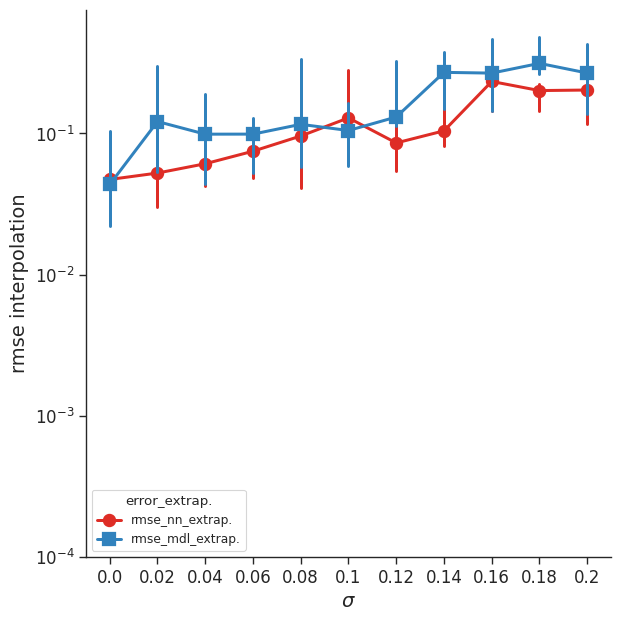

In [90]:
#Plot tanh interpolation
#----------------------------------------------------------------------------------------------------------------------
subplot_height = height
subplot_aspect = (width) / (height )

g = sns.catplot(data=errors_tanh_inter, x='sigma', y='value_interp.', hue='error_interp.', kind='point', estimator='median',
                errorbar=('ci', 95), markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
                seed=bs_seed, palette=[color_ann, color_bms], legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse interpolation', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

sns.despine()
plt.tight_layout()

name_fig= 'interpolation_medians_tanh_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

#Plot tanh extrapolation
#----------------------------------------------------------------------------------------------------------------------
g = sns.catplot(data=errors_tanh_extra, x='sigma', y='value_extrap.', hue='error_extrap.', kind='point', estimator='median',
                errorbar=('ci', 95), markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
                seed=bs_seed, palette=[color_ann, color_bms], legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse interpolation', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

sns.despine()
plt.tight_layout()

name_fig= 'extrapolation_medians_tanh_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

(0.0001, 0.75)

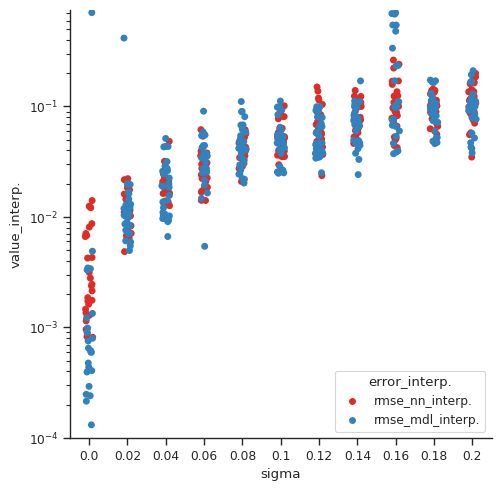

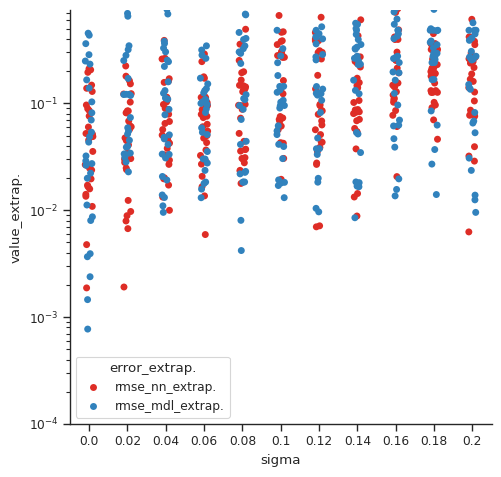

In [91]:
#Plot individual simulations
sns.catplot(data=errors_tanh_inter, x='sigma', y='value_interp.', hue='error_interp.',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

sns.catplot(data=errors_tanh_extra, x='sigma', y='value_extrap.', hue='error_extrap.',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

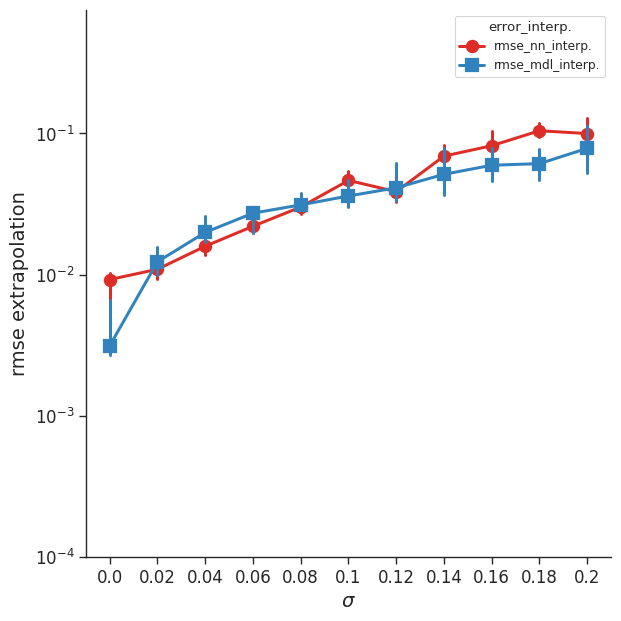

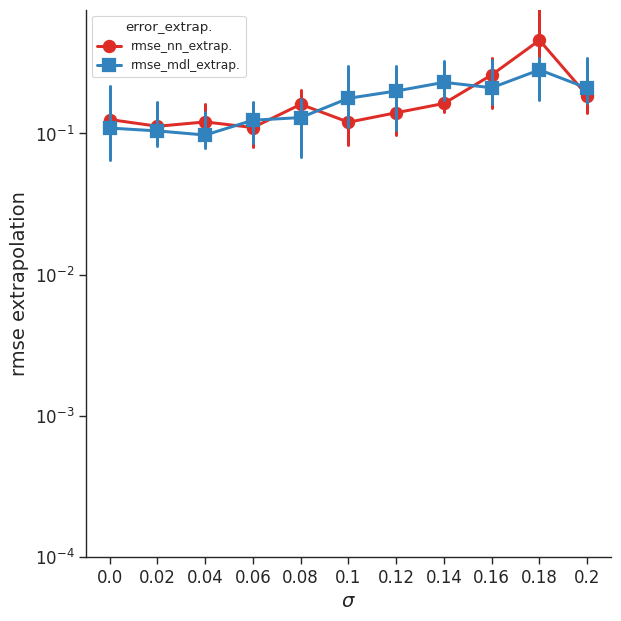

In [92]:
#Plot leaky interpolation
#----------------------------------------------------------------------------------------------------------------------
subplot_height = height
subplot_aspect = (width) / (height)

g = sns.catplot(data=errors_leaky_inter, x='sigma', y='value_interp.', hue='error_interp.', kind='point', estimator='median',
                errorbar=('ci', 95), markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
                seed=bs_seed, palette=[color_ann, color_bms], legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse extrapolation', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

sns.despine()
plt.tight_layout()

name_fig= 'interpolation_medians_leaky_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

#Plot leaky extrapolation
#----------------------------------------------------------------------------------------------------------------------
g = sns.catplot(data=errors_leaky_extra, x='sigma', y='value_extrap.', hue='error_extrap.', kind='point', estimator='median',
                errorbar=('ci', 95), markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
                seed=bs_seed, palette=[color_ann, color_bms], legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse extrapolation', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

sns.despine()
plt.tight_layout()

name_fig='extrapolation_medians_leaky_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)
#----------------------------------------------------------------------------------------------------------------------

(0.0001, 0.75)

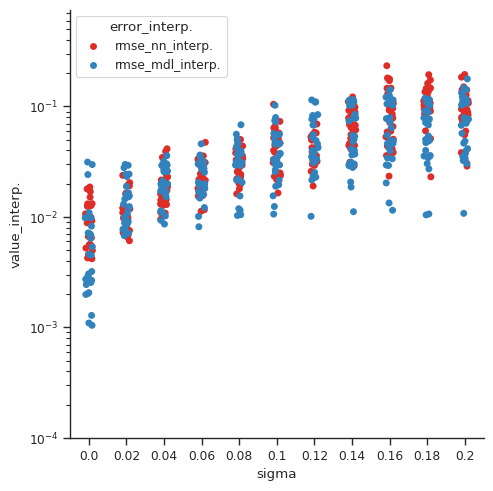

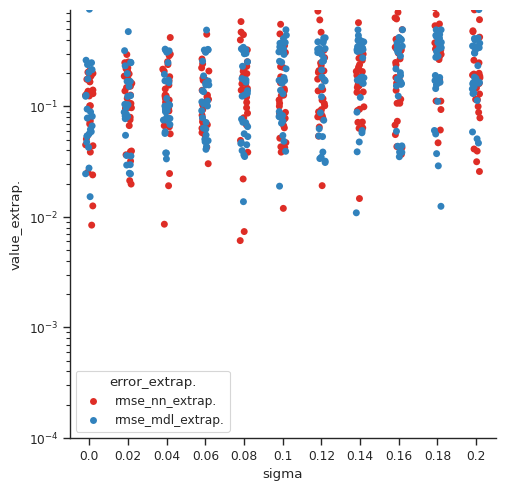

In [93]:
#Plot individual simulations leaky
sns.catplot(data=errors_leaky_inter, x='sigma', y='value_interp.', hue='error_interp.',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

sns.catplot(data=errors_leaky_extra, x='sigma', y='value_extrap.', hue='error_extrap.',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)